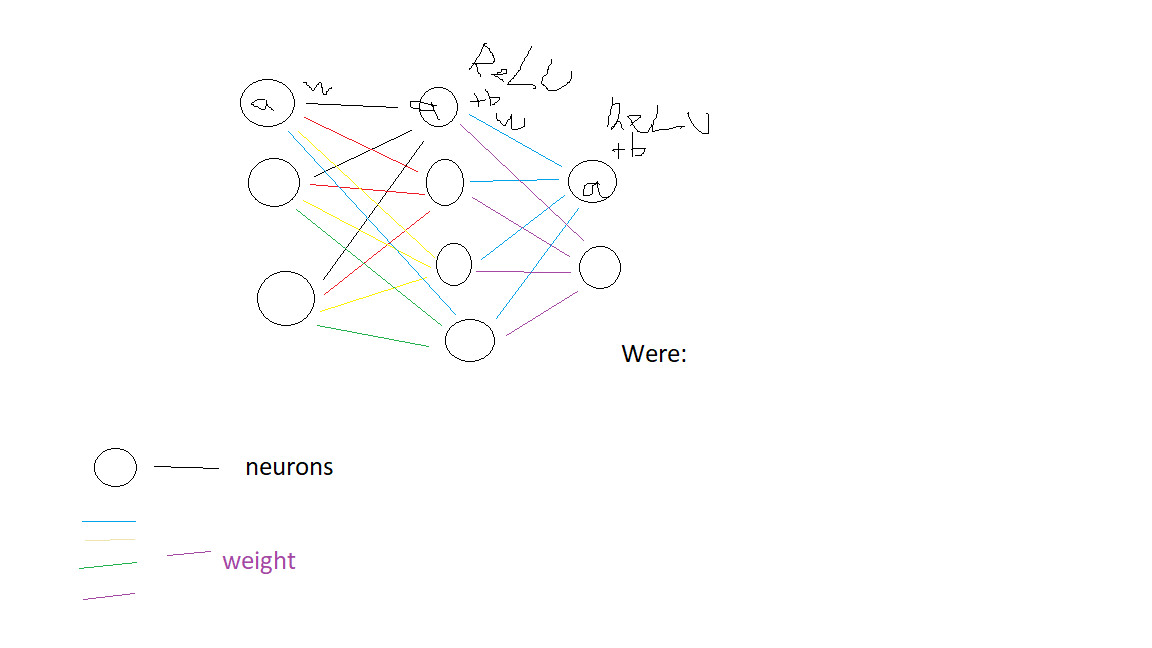

# ex2

The information enters the input layer as numerical features. These data are passed to the hidden layers, where each neuron computes a weighted sum of its inputs, adds a bias, and applies an activation function. The resulting values are passed forward through the network to the output layer, which generates the final prediction. This mechanism allows the network to capture complex patterns and minimize prediction error.

# ex3

In [1]:
import numpy as np  # numpy: работа с числовыми массивами и математическими операциями
                   # numpy: working with numerical arrays and mathematical operations

import matplotlib.pyplot as plt  # matplotlib.pyplot: визуализация данных — построение графиков
                                 # matplotlib.pyplot: data visualization — plotting graphs

from sklearn.metrics import mean_squared_error  # mean_squared_error: метрика для оценки качества модели (средняя квадратичная ошибка)
                                                # mean_squared_error: metric to evaluate model quality (mean squared error)


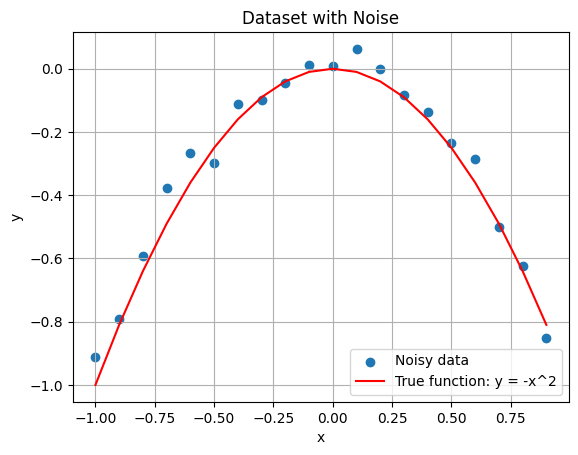

In [2]:
# Для воспроизводимости результатов
np.random.seed(0)

# Создаем 20 точек от -1 до 0.9 с шагом 0.1
x = np.arange(-1, 1, 0.1)

# Вычисляем y = -x^2
y_true = -x**2

# Создаем шум: нормальное распределение со средним 0 и std 0.05
noise = np.random.normal(0, 0.05, size=x.shape)

# Добавляем шум к y
y_noisy = y_true + noise

# Визуализация
plt.scatter(x, y_noisy, label='Noisy data')
plt.plot(x, y_true, color='red', label='True function: y = -x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with Noise')
plt.legend()
plt.grid(True)
plt.show()

# ex4

polynomial - demonstrates the relationship between input and output

Step 1: polynomial_fit function

In [3]:
import numpy as np

def polynomial_fit(x_train, y_train, degree):
    # Получаем коэффициенты полинома степени degree,
    # который минимизирует ошибку на тренировочных данных
    coeffs = np.polyfit(x_train, y_train, degree)
    # Создаем функцию полинома из коэффициентов
    poly = np.poly1d(coeffs)
    return poly


Step 2: plot_polyfit function

In [4]:
import matplotlib.pyplot as plt

def plot_polyfit(x_train, y_train, x_test, y_test, degree):
    poly = polynomial_fit(x_train, y_train, degree)

    # Создаем набор точек для гладкого графика полинома
    x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
    y_line = poly(x_line)

    # Визуализация
    plt.figure(figsize=(8,5))
    plt.scatter(x_train, y_train, color='blue', label='Training data')
    plt.scatter(x_test, y_test, color='green', label='Test data')
    plt.plot(x_line, y_line, color='red', label=f'Polynomial degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Fit Degree {degree}')
    plt.legend()
    plt.grid(True)
    plt.show()


Step 3: Visualization for powers 1, 7 and 11

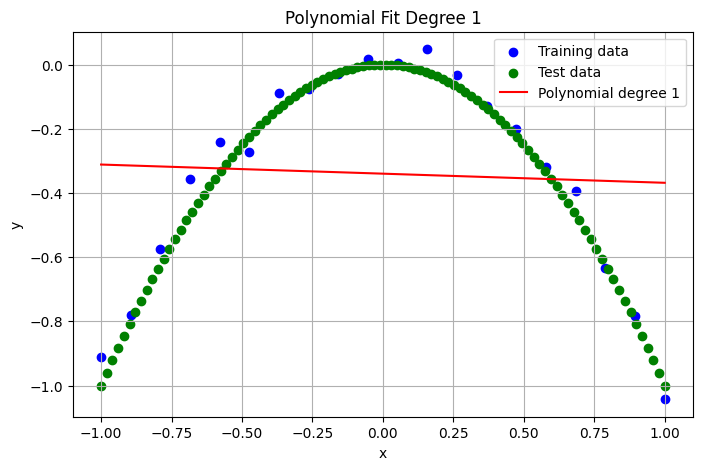

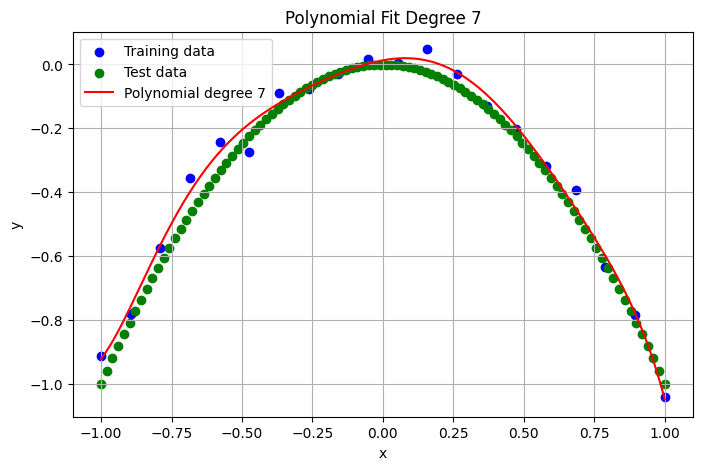

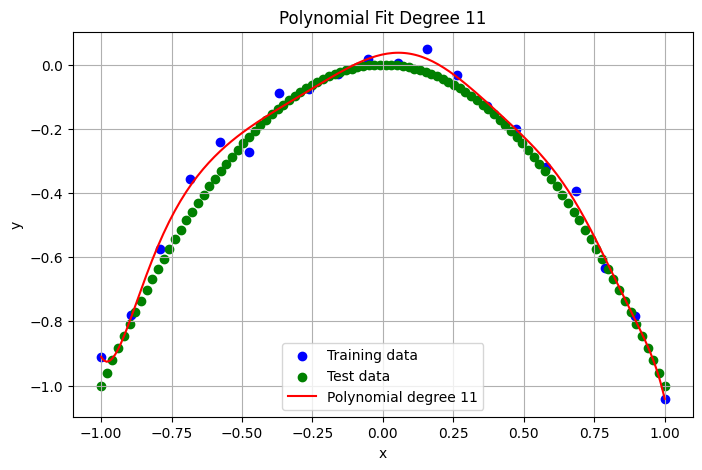

In [5]:
# Пример данных (если у тебя есть свои, замени)
np.random.seed(0)
x_train = np.linspace(-1, 1, 20)
y_train = -x_train**2 + np.random.normal(0, 0.05, size=x_train.shape)

x_test = np.linspace(-1, 1, 100)
y_test = -x_test**2

# Визуализируем для степеней 1, 7 и 11
for degree in [1, 7, 11]:
    plot_polyfit(x_train, y_train, x_test, y_test, degree)


ex5

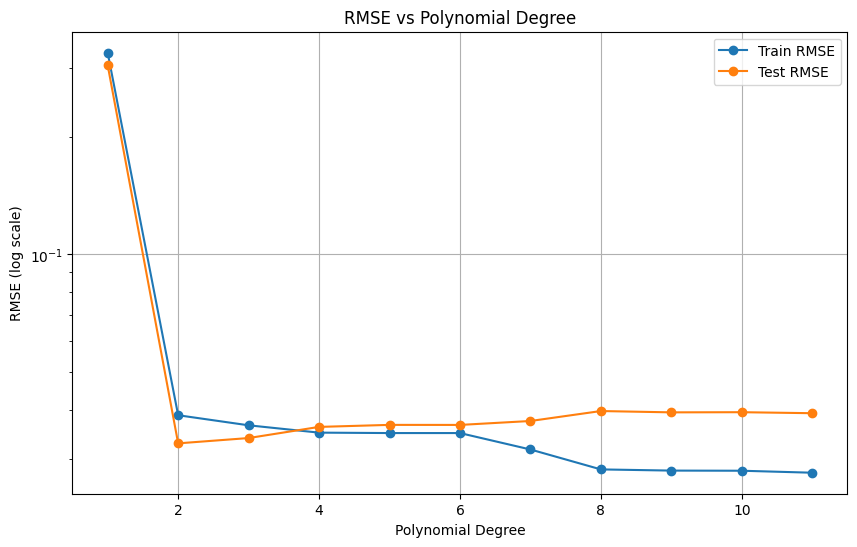

Best polynomial degree by test RMSE: 2


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Функция для обучения полинома и получения предсказаний
def polynomial_fit(x_train, y_train, degree):
    coeffs = np.polyfit(x_train, y_train, degree)
    poly = np.poly1d(coeffs)
    return poly

# Подготовим данные
np.random.seed(0)
x_train = np.linspace(-1, 1, 20)
y_train = -x_train**2 + np.random.normal(0, 0.05, size=x_train.shape)

x_test = np.linspace(-1, 1, 100)
y_test = -x_test**2  # настоящая функция без шума

# Списки для хранения результатов
results = []

# Цикл по степеням полинома
for degree in range(1, 12):
    poly = polynomial_fit(x_train, y_train, degree)

    # Предсказания
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)

    # RMSE (корень из средней квадратичной ошибки)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Записываем результаты
    results.append((degree, rmse_train, rmse_test))

# Преобразуем в массив для удобства
results = np.array(results)

# Визуализация
plt.figure(figsize=(10,6))
plt.plot(results[:,0], results[:,1], marker='o', label='Train RMSE')
plt.plot(results[:,0], results[:,2], marker='o', label='Test RMSE')
plt.yscale('log')  # логарифмическая шкала по оси Y
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE (log scale)')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Находим степень с минимальным RMSE на тесте
best_degree = int(results[np.argmin(results[:,2]), 0])
print(f"Best polynomial degree by test RMSE: {best_degree}")
